## Pràctica 8 - Homologia Persistent

Ara ja som capaços de calcular els grups d'homologia d'un complex simplicial (perfecte!) però pocs cops a la vida ens trobarem amb un poliedre sobre el que haguem de calcular grups d'homologia.

Les dades a analitzar habitualment no són més que un cúmul de punts de l'espai euclidià $n$-dimensional ($\mathbb{R}^n$).

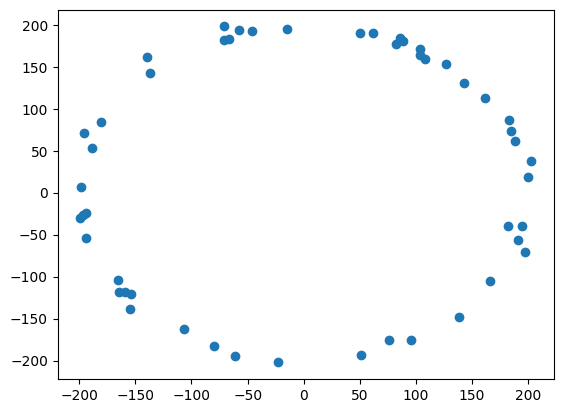

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("data/somedata.csv", delimiter=",")
plt.scatter(*data.T)
plt.show()

Però tot i així segueix existint una idea de forma en aquests punts aïllats. Tothom pot veure que el núvol de punts d'adalt té la forma de $S^1$ ($H_0 = \mathbb{R}$, $H_1 = \mathbb{R}$, $H_i = 0\, \forall i > 1$). El cas és que si ens mirem aquests 50 punts com el que són (50 punts aïllats de l'espai), les eines que hem tractat fins ara només veuen això: 50 components conexes contráctils ($H_0 = \mathbb{R}^{50}$, $H_i = 0\, \forall i > 0$).

Aquests punts no són més que punts aïllats, això és cert, però també son una mostra (un sample) d'una *realitat subjacent*, que en aquest cas és clarament una cosa amb forma de $S^1$. ¿Com podem construir un complex simplicial que representi aquesta figura subjacent d'un núvol de punts?

Existeix un antic teorema de topologia clàssica que diu "*tot es connex si ho dibuixes prou gruixut*".

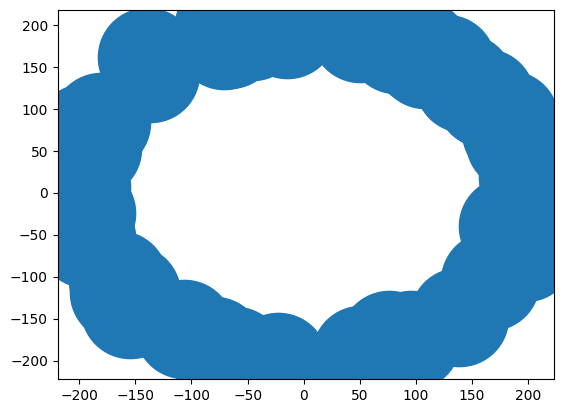

In [11]:
plt.scatter(*data.T, s=5000)
plt.show()

El resultat (la unió de totes les boles centrades a cadascun dels punts amb un radi fixat $r$) ara sí es un espai amb tipus d'homotopia com $S^1$. Si sapiguéssim calcular els grups d'homologia d'això podríem continuar, però nosaltres només sabem calcular els grups d'homologia d'un complex simplicial. Hem d'intentar construir un poliedre. Ho farem reaprofitant les classes que vam definir la setmana passada.

In [12]:
from simplicial import Simplex, SimplicialComplex

## Complexos de Ĉech i Vietoris-Rips

La primera aproximació de poliedre que representi la mateixa figura que el conjunt de boles de la figura superior és bastant clara:

- A cada punt del núvol, un vèrtex.
- Si dues boles es tallen entre sí, posem una aresta entre els dos centres.
- Si tres boles es tallen entre sí, posem un triangle entre els tres centres.

Aquesta construcció es pot generalitzar a qualsevol dimensió. Sobre cada punt posem una bola de dimensió $n$ (essent $n$ la dimensió de l'espai ambient) i si $k$ d'aquestes boles tenen intersecció no buida, aleshores posem un símplex de dimensió $k-1$ entre els seus centres. Aquesta construcció s'anomena complex de Ĉech.

**Prenent boles de radi r = 50, podeu construir el complex de Ĉech del conjunt de dades donat?**

In [13]:
# Exercici trampa!! No us capfiqueu massa.
# Si bé és fàcil determinar quan dues boles a R^2 intersecten, no existeix
# una forma trivial de determinar si 3 boles a R^2 tenen intersecció no buida.

Ara bé, com heu pogut veure, comprovar si 3 boles intersecten en el pla no és pas trivial. Generalitzar-ho al cas $n$-dimensional és encara molt menys trivial, i intractable computacionalment. És per això que tenim una altra construcció molt similar a aquesta, però tot i que no del tot idèntica.

- A cada punt del núvol, un vèrtex.
- Si dues boles es tallen entre sí, posem una aresta entre els dos centres.
- Si tres boles es tallen entre sí dos a dos, posem un triangle entre els tres centres.
- En general, si $k$ boles es tallen entre sí dos a dos, posem un símplex de dimensió $k-1$ entre els seus centres.

Aquest complex s'anomena complex de Vietoris-Rips i és el que s'utilitza habitualment ja que calcular la intersecció de boles 2 a 2 sí es trivial (només hem de mirar la distància entre els punts). En realitat, la definició formal es dóna en termes de distància i no pas del radi de les boles.

- A cada punt del núvol, un vèrtex.
- Si $k$ punts es troben a distància més petita que $r$ entre ells dos a dos, aleshores posem un símplex de dimensió $k-1$ entre els seus centres.

Donat un conjunt de punts $X$ de l'espai euclidià, anomenem $VR_r(X)$ el complex de Vietoris-Rips de radi $r$.

**Prenent una distància r = 100, construiu el complex de Vietoris-Rips del conjunt de dades donat**

## Filtracions

Els complexos de Ĉech i Vietoris-Rips formen una família de complexos simplicials indexada pel paràmetre $r \in (0, \infty)$ i amb una propietat molt important: si $r_1 < r_2$, aleshores $VR_{r_1} \subset VR_{r_2}$ i $Cech_{r_1} \subset Cech_{r_2}$. Formen el que en teoria de conjunts s'anomena una *filtració*.

**Feu un dibuix interactiu en el que es mostri el el complex $VR_r(X)$ per diferents valors de $r$**

Així doncs, tant en la filtració de Ĉech com en la de Vietoris-Rips el que tenim veiem és que, començant des del núvol de punts, es van afegint ordenadament símplexs a cada pas, fins a arribar al cas $r \rightarrow \infty$ en el qual tindríem una bola sòlida conformada per tots els punts formant simplexs entre sí.

Aquesta és una observació importantísima: les filtracions les podem pensar com una ordenació dels símplexs del complex final. Si anomenem $K$ al conjunt simplicial format per tots els possibles simplexs formats amb punts de $X$, aleshores la filtració associa a cada un d'aquests símplexs un valor real positiu, l'índex en el qual apareixen.

Aquesta observació és computacionalment molt significativa: en comptes de calcular quins símplexs hi han a cada pas, el que hem de fer és trobar en quin moment entra cadascun. Tots els possibles simplexs entraran a la filtració tard o d'hora, i un cop entren romanen fins al final. El que hem de fer és trobar quin és l'index que s'associa a cadascun.

**Definiu una classe ```Filtration``` que construeixi una filtració Vietoris-Rips**

## Homologia Persistent

La homologia persistent consisteix en veure com varien els grups d'homologia al llarg d'una filtració. Hi ha una altra simplificació computacional, però, no cal que calculem els grups d'homologia escalonant matrius en cada punt de la filtració.

La inclusió en els diferents complexos simplicials de la filtració indueix una inclusió en els grups d'homologia de cadascun d'aquests. Això fa que poguem "seguir el rastre" dels forats que van apareixent i desapareixent al llarg de la filtració. Cada forat *neix* en un cert index de la filtració i *mor* en un índex posterior. No ens posarem en aquesta pràctica a desenvolupar nosaltres aquest algoritme. Afortunadament, existeixen llibreries (no moltes) de Python que ens poden fer la feina.

Qui estigui interessat, pot llegir sobre l'algoritme d'homologia persistent en el [següent enllaç](https://epjdatascience.springeropen.com/articles/10.1140/epjds/s13688-017-0109-5).

El principal punt de partida per TDA amb Python és [scikit-tda](https://scikit-tda.org/libraries.html), que és una col·lecció de diverses llibreries cadascuna amb una finalitat diferent dins d'aquest món.

Al 2019, però, va aparéixer la llibreria ```giotto-tda``` que recull d'una forma més raonable tot el que dona ```scikit-tda``` i aporta a més noves eines per enllaçar TDA amb ML. Té una [bona documentació](https://giotto-ai.github.io/gtda-docs/0.5.1/library.html) i un rendiment molt raonable.

El seu ús és bastant directe.

In [14]:
from gtda.homology import VietorisRipsPersistence

VR = VietorisRipsPersistence()
diagrams = VR.fit_transform([data])
diagrams

array([[[  0.        ,   4.00198078,   0.        ],
        [  0.        ,   4.09942293,   0.        ],
        [  0.        ,   4.31202078,   0.        ],
        [  0.        ,   4.70729303,   0.        ],
        [  0.        ,   5.10500336,   0.        ],
        [  0.        ,   5.59158516,   0.        ],
        [  0.        ,   6.59244776,   0.        ],
        [  0.        ,   6.87725163,   0.        ],
        [  0.        ,   7.15818739,   0.        ],
        [  0.        ,  11.52673912,   0.        ],
        [  0.        ,  11.89977264,   0.        ],
        [  0.        ,  12.1614666 ,   0.        ],
        [  0.        ,  12.25655937,   0.        ],
        [  0.        ,  13.39768505,   0.        ],
        [  0.        ,  13.69276905,   0.        ],
        [  0.        ,  13.87179661,   0.        ],
        [  0.        ,  13.95086861,   0.        ],
        [  0.        ,  15.36713696,   0.        ],
        [  0.        ,  16.71785164,   0.        ],
        [  0

Aquest objecte ```diagrams``` és una llista de tots els forats que presenta la filtració, amb el seu punt de naixement, mort i dimensió.

La forma habitual de representar els resultats de la homologia persistent es mitjançant els anomenats diagrames de persistència. S'expliquen sols:

In [19]:
from gtda.plotting import plot_diagram

plot_diagram(diagrams[0])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'none',
              'line': {'color': 'black', 'dash': 'dash', 'width': 1},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter',
              'x': [-6.821331787109375, 347.88792114257814],
              'y': [-6.821331787109375, 347.88792114257814]},
             {'hoverinfo': 'text',
              'hovertext': [(0.0, 4.001980781555176), (0.0, 4.099422931671143),
                            (0.0, 4.312020778656006), (0.0, 4.7072930335998535),
                            (0.0, 5.105003356933594), (0.0, 5.591585159301758),
                            (0.0, 6.592447757720947), (0.0, 6.877251625061035),
                            (0.0, 7.158187389373779), (0.0, 11.526739120483398),
                            (0.0, 11.899772644042969), (0.0, 12.161466598510742),
                            (0.0, 12.256559371948242), (0.0, 13.397685050964355),
                            (0.0, 13.692769050598145), (0.0, 13.871796607971191),
                            (0.0, 13.950868606567383), (0.0, 15.36713695526123),
                            (0.0, 16.717851638793945), (0.0, 17.742982864379883),
                            (0.0, 18.27314567565918), (0.0, 18.972625732421875),
                            (0.0, 19.014408111572266), (0.0, 19.05381202697754),
                            (0.0, 19.788009643554688), (0.0, 19.962644577026367),
                            (0.0, 20.518508911132812), (0.0, 22.22888946533203),
                            (0.0, 23.91154670715332), (0.0, 24.208860397338867),
                            (0.0, 26.69194793701172), (0.0, 27.58435821533203),
                            (0.0, 27.776599884033203), (0.0, 30.366479873657227),
                            (0.0, 30.932466506958008), (0.0, 31.358076095581055),
                            (0.0, 33.512516021728516), (0.0, 33.63117980957031),
                            (0.0, 38.56843566894531), (0.0, 47.55465316772461),
                            (0.0, 48.14008331298828), (0.0, 50.2009391784668),
                            (0.0, 51.17858123779297), (0.0, 53.65116500854492),
                            (0.0, 57.82559585571289), (0.0, 58.66179656982422),
                            (0.0, 65.18260955810547), (0.0, 71.35023498535156),
                            (0.0, 72.2824478149414)],
              'mode': 'markers',
              'name': 'H0',
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAA='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAQAcCEEAAAAAgz2UQQAAAAGCCPx' ... 'Dgr0tQQAAAAEBq1lFAAAAAoBMSUkA='),
                    'dtype': 'f8'}},
             {'hoverinfo': 'text',
              'hovertext': [(74.28272247314453, 341.06658935546875)],
              'mode': 'markers',
              'name': 'H1',
              'type': 'scatter',
              'x': {'bdata': 'AAAAIBiSUkA=', 'dtype': 'f8'},
              'y': {'bdata': 'AAAAwBBRdUA=', 'dtype': 'f8'}}],
    'layout': {'height': 500,
               'plot_bgcolor': 'white',
               'template': '...',
               'width': 500,
               'xaxis': {'autorange': False,
                         'exponentformat': 'e',
                         'linecolor': 'black',
                         'linewidth': 1,
                         'mirror': False,
                         'range': [-6.821331787109375, 347.88792114257814],
                         'showexponent': 'all',
                         'showline': True,
                         'side': 'bottom',
                         'ticks': 'outside',
                         'title': {'text': 'Birth'},
                         'type': 'linear',
                         'zeroline': True},
               'yaxis': {'autorange': False,
                         'exponentformat': 'e',
                         'linecolor': 'black',
                         'linewidth': 1,
        

En el diagrama veiem un munt de *forats de dimensió 0* (components connexes) que neixen totes a l'instant inicial i moren abans d'arribar a l'index 100. En aquest punt neix un forat de dimensió 1 que viu fins méx enllà de l'index 300.

Com més allunyat estigui un punt de la diagonal, més llarga és la seva vida i, en conseqüència, més factible és la seva presència en al figura subjacent del núvol de punts.

## Entrega

**Dibuixeu el diagrama de persistència dels conjunts de dades donats i deduïu la seva forma**